In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của trang Wikipedia
url = "https://vi.wikipedia.org/wiki/Bản_mẫu:Dữ_liệu_đại_dịch_COVID-19/Thống_kê_tại_Việt_Nam"

# Gửi yêu cầu GET đến trang web
response = requests.get(url)

# Kiểm tra nếu yêu cầu thành công
if response.status_code == 200:
    # Phân tích trang HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Tìm bảng chứa dữ liệu
    table = soup.find('table', {'class': 'wikitable'})

    # Lấy tất cả các dòng trong bảng
    rows = table.find_all('tr')

    # Khởi tạo list để lưu trữ dữ liệu
    data = []

    # Duyệt qua các dòng và trích xuất dữ liệu
    for row in rows[1:]:  # Bỏ qua dòng tiêu đề
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Tạo DataFrame từ dữ liệu
    df = pd.DataFrame(data, columns=['Tỉnh thành', 'Ca nhiễm', 'Tử vong', 'Ca mắc mới'])
    print(df)
else:
    print("Không thể truy cập trang web")

                                           Tỉnh thành    Ca nhiễm Tử vong  \
0                                          Cả nước[b]  11.549.848  42.789   
1                                              Hà Nội   1.646.923   1.232   
2                                     TP. Hồ Chí Minh     629.018  19.985   
3                                           Hải Phòng     537.527     138   
4                                             Nghệ An     502.049     145   
..                                                ...         ...     ...   
60                                          Sóc Trăng      34.457     634   
61                                            Kon Tum      26.342       1   
62                                          Hậu Giang      17.900     231   
63                                         Ninh Thuận       9.001      60   
64  ^ Tỉnh thành nơi xác nhận nhiễm, không phải qu...        None    None   

   Ca mắc mới  
0         140  
1           2  
2           3  
3          

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của trang web bạn muốn lấy dữ liệu (thay thế bằng URL cụ thể)
url = "https://www.iqair.com/world-air-quality"

# Gửi yêu cầu đến trang web
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Phân tích nội dung và tìm bảng dữ liệu
data = []
table = soup.find('table')  # Điều chỉnh để tìm bảng cụ thể
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Bỏ qua tiêu đề
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append(cols)

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data, columns=['City', 'AQI', 'PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2'])
print(df)

# Lưu vào file CSV
df.to_csv('air_quality_data.csv', index=False)


Empty DataFrame
Columns: [City, AQI, PM2.5, PM10, CO, NO2, O3, SO2]
Index: []


In [3]:
import pandas as pd
import requests

# Fetch the data.
df1 = pd.read_csv("https://ourworldindata.org/grapher/international-tourist-arrivals-by-region-of-origin.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/international-tourist-arrivals-by-region-of-origin.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [4]:
df1

,Entity,Code,Year,inbound_tourism_by_region
0,Africa (UNWTO),NaN,1995,12825738
1,Africa (UNWTO),NaN,1996,14147503
2,Africa (UNWTO),NaN,1997,13960251
3,Africa (UNWTO),NaN,1998,15610950
4,Africa (UNWTO),NaN,1999,15517119
...,...,...,...,...
191,South Asia (UNWTO),NaN,2018,35049256
192,South Asia (UNWTO),NaN,2019,37830564
193,South Asia (UNWTO),NaN,2020,8334362
194,South Asia (UNWTO),NaN,2021,9185303


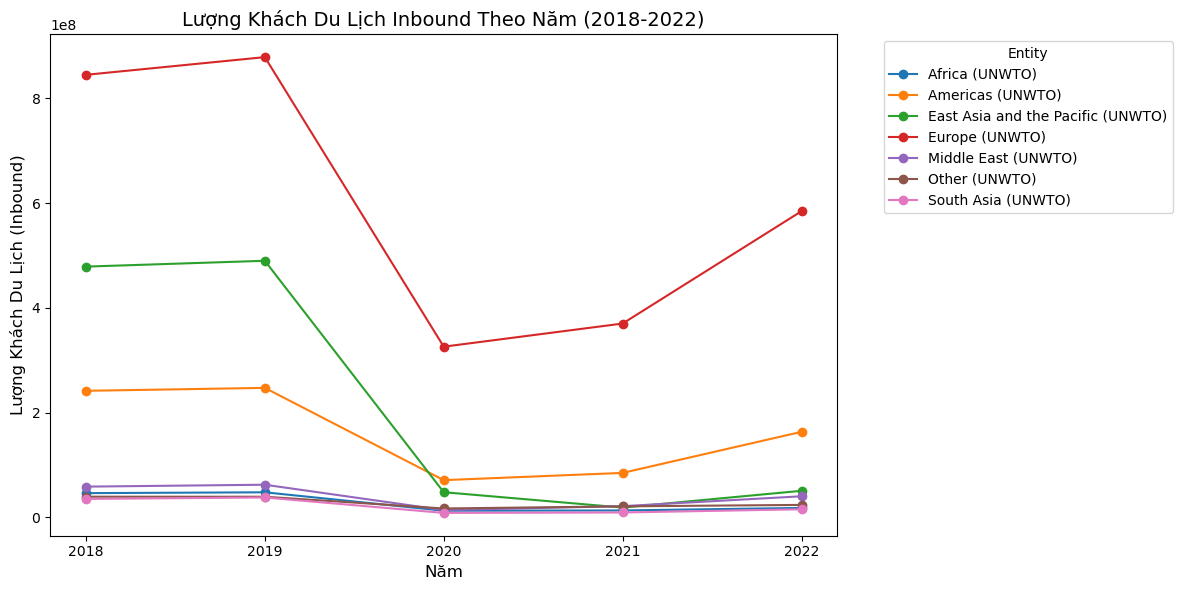

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Lọc dữ liệu từ năm 2018 đến 2022
df_filtered = df1[(df1['Year'] >= 2018) & (df1['Year'] <= 2022)]

# Vẽ biểu đồ đường cho từng Entity
plt.figure(figsize=(12, 6))

# Lặp qua từng Entity để vẽ biểu đồ đường
for entity in df_filtered['Entity'].unique():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['inbound_tourism_by_region'], marker='o', label=entity)

# Thiết lập tiêu đề và nhãn trục
plt.title('Lượng Khách Du Lịch Inbound Theo Năm (2018-2022)', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Lượng Khách Du Lịch (Inbound)', fontsize=12)
plt.xticks(df_filtered['Year'].unique())
plt.legend(title="Entity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
df

,Tỉnh thành,Ca nhiễm,Tử vong,Ca mắc mới
0,Cả nước[b],11.549.848,42.789,140
1,Hà Nội,1.646.923,1.232,2
2,TP. Hồ Chí Minh,629.018,19.985,3
3,Hải Phòng,537.527,138,5
4,Nghệ An,502.049,145,11
...,...,...,...,...
60,Sóc Trăng,34.457,634,0
61,Kon Tum,26.342,1,0
62,Hậu Giang,17.900,231,0
63,Ninh Thuận,9.001,60,0


In [4]:
df = df[~df.index.isin([0, 64])]

In [5]:
df

,Tỉnh thành,Ca nhiễm,Tử vong,Ca mắc mới
1,Hà Nội,1.646.923,1.232,2
2,TP. Hồ Chí Minh,629.018,19.985,3
3,Hải Phòng,537.527,138,5
4,Nghệ An,502.049,145,11
5,Bắc Giang,391.440,92,0
...,...,...,...,...
59,Tiền Giang,39.902,1.290,0
60,Sóc Trăng,34.457,634,0
61,Kon Tum,26.342,1,0
62,Hậu Giang,17.900,231,0


In [6]:
url = "https://www.worldometers.info/environment/air-pollution/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Lấy các thông số từ bảng
rows = soup.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        parameter = cols[0].text.strip()
        value = cols[1].text.strip()
        data.append({'Thông số': parameter, 'Giá trị': value})

# Lưu dữ liệu
df = pd.DataFrame(data)
df.to_csv('worldometers_pollution.csv', index=False)
print("Dữ liệu đã được lưu vào file worldometers_pollution.csv")


Dữ liệu đã được lưu vào file worldometers_pollution.csv


In [1]:
import requests
import pandas as pd

# Danh sách các nước G20 + Việt Nam
countries = ['VN', 'AR', 'AU', 'BR', 'CA', 'CN', 'FR', 'DE', 'IN', 'ID', 'IT', 'JP', 'KR', 'MX', 'RU', 'SA', 'ZA', 'TR', 'GB', 'US', 'EU']

# Các chỉ số cần lấy
indicators = {
    "GDP Growth (%)": "NY.GDP.MKTP.KD.ZG",
    "Unemployment Rate (%)": "SL.UEM.TOTL.ZS"
}

# Giai đoạn thời gian
years = [2021, 2022]

# Base URL của World Bank API
base_url = "http://api.worldbank.org/v2/country/{}/indicator/{}"

# Tập hợp dữ liệu
data = []

for country in countries:
    for indicator_name, indicator_code in indicators.items():
        for year in years:
            try:
                # Gửi yêu cầu tới API
                url = base_url.format(country, indicator_code)
                response = requests.get(url, params={"date": year, "format": "json"})
                response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
                response_data = response.json()

                # Kiểm tra dữ liệu phản hồi một cách rõ ràng hơn
                if response_data[0]['page'] * response_data[0]['pages'] < response_data[0]['total']:
                    print(f"Warning: Not all data retrieved for {country}, {indicator_name}, {year}. Pagination may be required.")

                if len(response_data) > 1 and response_data[1]:
                    value = response_data[1][0].get("value")
                else:
                    value = None

                # Thêm dữ liệu vào danh sách
                data.append({
                    "Country": country,
                    "Year": year,
                    "Indicator": indicator_name,
                    "Value": value
                })

            except requests.exceptions.RequestException as e:
                print(f"Error fetching data for {country} ({indicator_name} in {year}): {e}")


# Chuyển đổi thành DataFrame
df = pd.DataFrame(data)

# Tạo bảng dạng pivot để dễ quan sát
pivot_df = df.pivot(index=["Country", "Year"], columns="Indicator", values="Value").reset_index()

# Hiển thị dữ liệu
print(pivot_df)

# Lưu vào file CSV
pivot_df.to_csv("worldbank_data_g20_vietnam_2021_2022.csv", index=False)

Indicator Country  Year  GDP Growth (%)  Unemployment Rate (%)
0              AR  2021       10.718010               8.736000
1              AR  2022        4.956370               6.805000
2              AU  2021        2.111831               5.116000
3              AU  2022        4.268946               3.701000
4              BR  2021        4.762604              13.159000
5              BR  2022        3.016694               9.231000
6              CA  2021        5.286957               7.527000
7              CA  2022        3.819866               5.280000
8              CN  2021        8.448469               4.550000
9              CN  2022        2.989084               4.980000
10             DE  2021        3.163820               3.638000
11             DE  2022        1.806209               3.135000
12             EU  2021        6.008729               7.022608
13             EU  2022        3.478654               6.147076
14             FR  2021        6.435210               7

In [8]:
import pandas as pd
import requests

# Fetch the data.
df2 = pd.read_csv("https://ourworldindata.org/grapher/economic-decline-in-the-second-quarter-of-2020.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/economic-decline-in-the-second-quarter-of-2020.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [10]:
df2

,Entity,Code,Year,"GDP growth from previous year, 2020 Q2"
0,Austria,AUT,2020,-13.300000
1,Belgium,BEL,2020,-14.500000
2,Bulgaria,BGR,2020,-8.200000
3,Canada,CAN,2020,-13.494697
4,Chile,CHL,2020,-13.682773
5,China,CHN,2020,3.200000
6,Colombia,COL,2020,-15.700000
7,Cyprus,CYP,2020,-11.900000
8,Czechia,CZE,2020,-10.700000
9,Denmark,DNK,2020,-8.500000


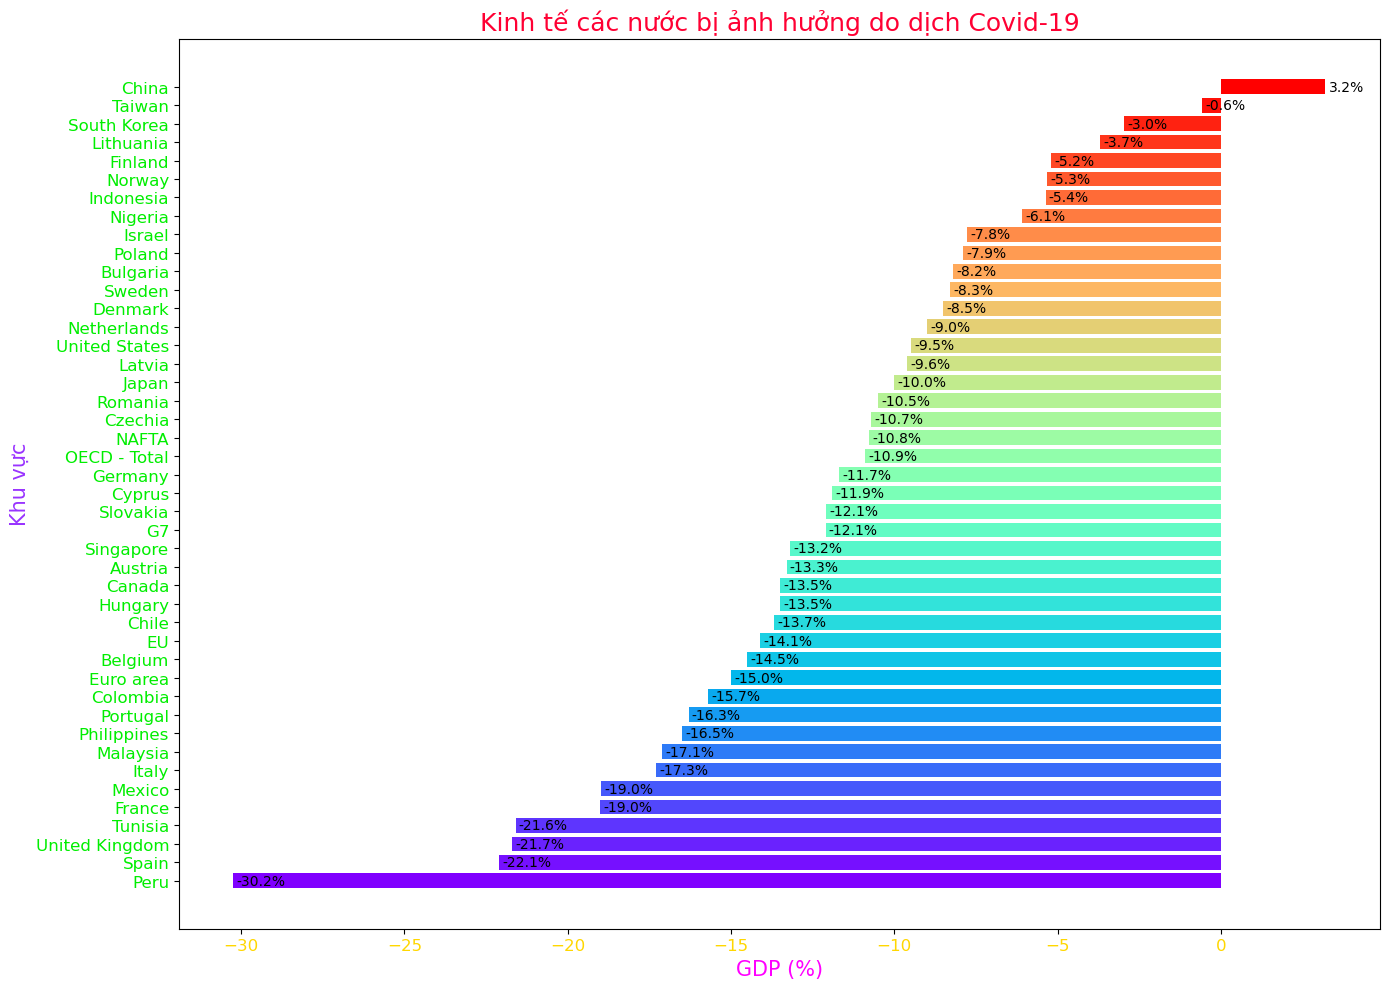

In [11]:
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_covid_19 = df2

data_economic = data_covid_19[["Entity","GDP growth from previous year, 2020 Q2"]]
data_economic = data_economic.sort_values(by="GDP growth from previous year, 2020 Q2",ascending=True)
colors = rainbow(np.linspace(0, 1, len(data_economic)))

plt.figure(figsize=(14, 10), dpi=100, facecolor='white')  # Thêm dòng này

bars = plt.barh(data_economic["Entity"], data_economic["GDP growth from previous year, 2020 Q2"], color=colors)
plt.xlabel("GDP (%)", fontsize=15, color="#FF00FF")
plt.ylabel("Khu vực", fontsize=15, color="#9933FF")
plt.tick_params(axis="y", labelcolor="#00EE00",labelsize=12)
plt.tick_params(axis="x", labelcolor="#FFD700", labelsize=12)
plt.title(
    "Kinh tế các nước bị ảnh hưởng do dịch Covid-19",
    fontsize=18,
    color="#FF0033",
)
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.1f}%",
        va="center",
        ha="left",
        fontsize=10,
    )
plt.tight_layout()
plt.show()